### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from glob import glob
%matplotlib inline

### Data Exploration

In [4]:
# Reading the train and test meta-data files
train = pd.read_csv('DL3 Dataset/train.csv')
test = pd.read_csv('DL3 Dataset/test.csv')

In [5]:
train.head()

Image_name  attrib_01  attrib_02  attrib_03  attrib_04  attrib_05  \
0  Image-1.jpg          0          0          0          0          0   
1  Image-2.jpg          1          0          0          1          0   
2  Image-3.jpg          1          0          0          1          0   
3  Image-4.jpg          1          0          0          1          0   
4  Image-5.jpg          0          0          0          1          0   

   attrib_06  attrib_07  attrib_08  attrib_09    ...      attrib_76  \
0          1          1          0          0    ...              1   
1          0          1          1          0    ...              1   
2          0          0          1          1    ...              1   
3          0          0          0          1    ...              1   
4          0          0          0          1    ...              0   

   attrib_77  attrib_78  attrib_79  attrib_80  attrib_81  attrib_82  \
0          0          0          0          0          0          0   
1          1          1          1          0          0          0   
2          0          0          1          0          1          0   
3          0          1          1          1          0          0   
4          0          0          1          0          0          0   

   attrib_83  attrib_84  attrib_85  
0          0          0          1  
1          1          0          1  
2          1          0          1  
3          0          0          0  
4          1          0          0  

[5 rows x 86 columns]

In [6]:
# Shape of training and test datasets
print ('Training dataset consists of {} images with {} attributes'.format(train.shape[0], train.shape[1]-1))
# Shape of training and test datasets
print ('Testing dataset consists of {} images.'.format(test.shape[0]))

Training dataset consists of 12600 images with 85 attributes
Testing dataset consists of 5400 images.


Let's have a look at the columns of the training data.

In [7]:
print('Columns in the dataset:\n\n', train.columns)

Columns in the dataset:

 Index(['Image_name', 'attrib_01', 'attrib_02', 'attrib_03', 'attrib_04',
       'attrib_05', 'attrib_06', 'attrib_07', 'attrib_08', 'attrib_09',
       'attrib_10', 'attrib_11', 'attrib_12', 'attrib_13', 'attrib_14',
       'attrib_15', 'attrib_16', 'attrib_17', 'attrib_18', 'attrib_19',
       'attrib_20', 'attrib_21', 'attrib_22', 'attrib_23', 'attrib_24',
       'attrib_25', 'attrib_26', 'attrib_27', 'attrib_28', 'attrib_29',
       'attrib_30', 'attrib_31', 'attrib_32', 'attrib_33', 'attrib_34',
       'attrib_35', 'attrib_36', 'attrib_37', 'attrib_38', 'attrib_39',
       'attrib_40', 'attrib_41', 'attrib_42', 'attrib_43', 'attrib_44',
       'attrib_45', 'attrib_46', 'attrib_47', 'attrib_48', 'attrib_49',
       'attrib_50', 'attrib_51', 'attrib_52', 'attrib_53', 'attrib_54',
       'attrib_55', 'attrib_56', 'attrib_57', 'attrib_58', 'attrib_59',
       'attrib_60', 'attrib_61', 'attrib_62', 'attrib_63', 'attrib_64',
       'attrib_65', 'attrib_66', 'att

###  Data Visualization

Now we will visualize our data to get a better understanding of it.

We will begin with visualizing the distribution of the labels in the training data.

In [8]:
cols = list(train.columns)
cols.remove('Image_name')
cols.sort()

In [9]:
count_labels = train[cols].sum()

In [10]:
count_labels.sort_values(inplace=True)

From the figure below, we can see that there are 85 different attributes/ labels and Attrib_21 is common in almost all animals while Attrib_66 is rare.

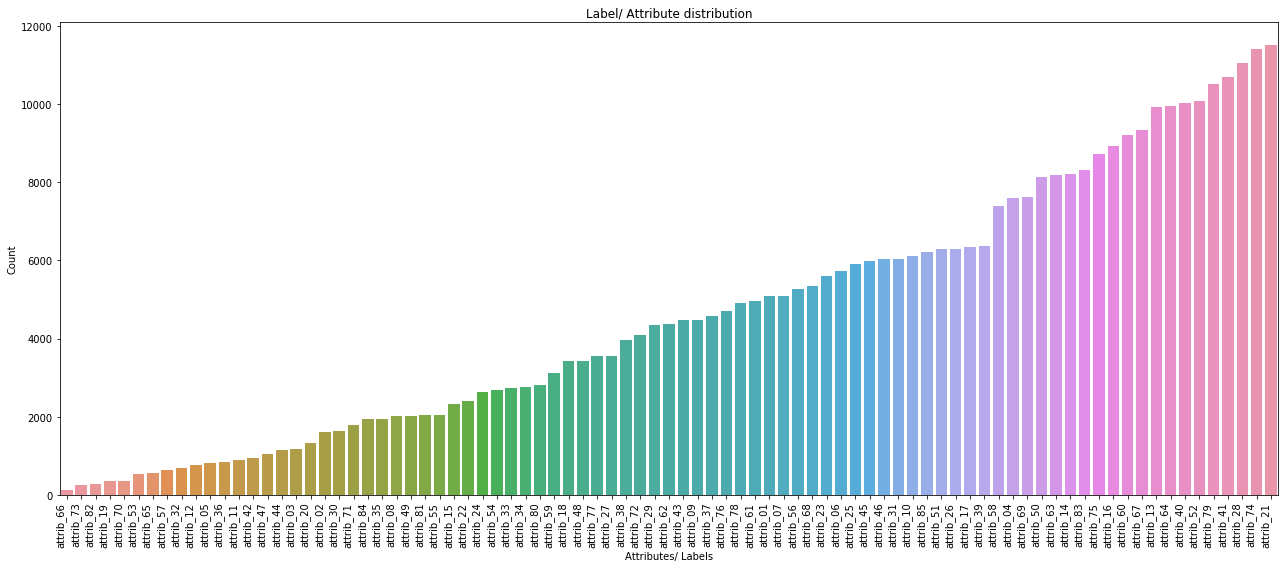

In [11]:
plt.figure(figsize=(18, 8))
ax = sns.barplot(x=count_labels.index, y=count_labels.values)
ax.set_xticklabels(labels=count_labels.index,rotation=90, ha='right')
ax.set_ylabel('Count')
ax.set_xlabel('Attributes/ Labels')
ax.title.set_text('Label/ Attribute distribution')
plt.tight_layout()

In [12]:
label_data = np.array(train[cols])

Next we will compute the co-occurrence matrix for the labels. 

In [13]:
# Compute the cooccurrence matrix
cooccurrence_matrix = np.dot(label_data.transpose(), label_data)
print('\n Co-occurence matrix: \n', cooccurrence_matrix)


 Co-occurence matrix: 
 [[5091  728  797 ... 3797  728 2024]
 [ 728 1614    0 ...  669 1614 1003]
 [ 797    0 1188 ... 1188    0  359]
 ...
 [3797  669 1188 ... 8305  743 3629]
 [ 728 1614    0 ...  743 1933 1322]
 [2024 1003  359 ... 3629 1322 6227]]


In [14]:
# Compute the cooccurrence matrix in percentage
# Refrence: https://stackoverflow.com/questions/20574257/constructing-a-co-occurrence-matrix-in-python-pandas/20574460
cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)
with np.errstate(divide = 'ignore', invalid='ignore'):
    cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(cooccurrence_matrix, cooccurrence_matrix_diagonal))

In [15]:
print('\n Co-occurrence matrix paercentage: \n', cooccurrence_matrix_percentage)


 Co-occurrence matrix paercentage: 
 [[1.         0.45105328 0.67087542 ... 0.45719446 0.37661666 0.32503613]
 [0.14299745 1.         0.         ... 0.08055388 0.83497155 0.16107275]
 [0.15655078 0.         1.         ... 0.14304636 0.         0.05765216]
 ...
 [0.74582597 0.41449814 1.         ... 1.         0.38437662 0.58278465]
 [0.14299745 1.         0.         ... 0.08946418 1.         0.21230127]
 [0.39756433 0.62143742 0.30218855 ... 0.43696568 0.68391102 1.        ]]


From the plot of the co-occurence matrix (below), we can see which labels(or attributes) genreally occur together.

Text(0.5,1,'Co-occurrence Matrix of the Labels')

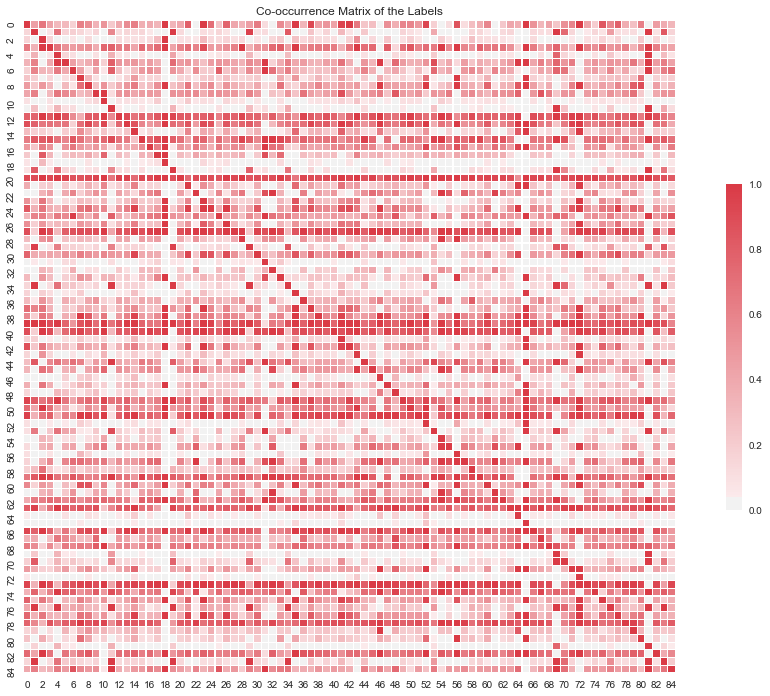

In [16]:
ax = plt.figure(figsize=(18, 12))

sns.set(style='white')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(cooccurrence_matrix_percentage, cmap=cmap, center=0, square=True, linewidths=0.15, cbar_kws={"shrink": 0.5})

plt.title('Co-occurrence Matrix of the Labels')

We define the paths to the image folders.

In [17]:
TRAIN_PATH = 'DL3 Dataset/train_img/'
TEST_PATH = 'DL3 Dataset/test_img/'

In [18]:
img_path = TRAIN_PATH+str(train.Image_name[0])

We import the OpenCV and Python Image library for image manipulation. 

In [19]:
from PIL import Image
import cv2

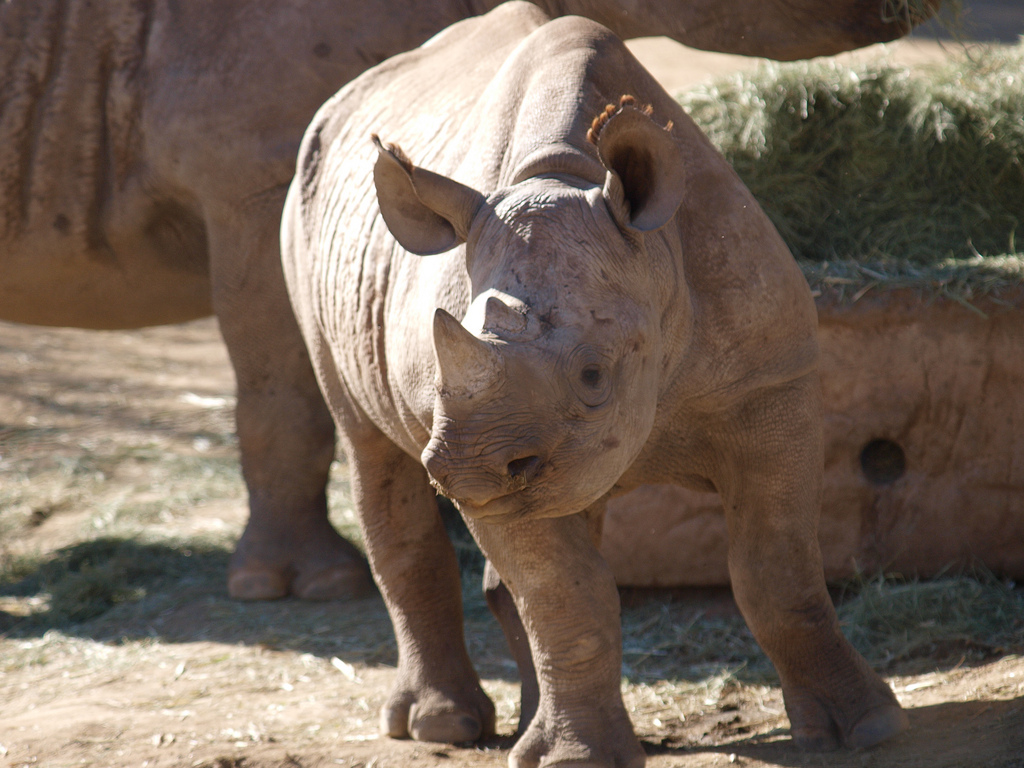

In [20]:
Image.open(img_path)

The computer cannot see shapes or colors. It reads each image as an array of numbers.

In [21]:
img = cv2.imread(img_path)

In [22]:
# Shape of each image
img.shape

(768, 1024, 3)

In [23]:
# Extracting label columns
label_cols = list(set(train.columns) - set(['Image_name']))
label_cols.sort()

In [24]:
# Extracting labels corresponding to image at the zeroth index of the training dataset.
labels = train.iloc[0][2:].index[train.iloc[0][2:] == 1]

We plot the Animal and the attributes/ labels corresponding to it.

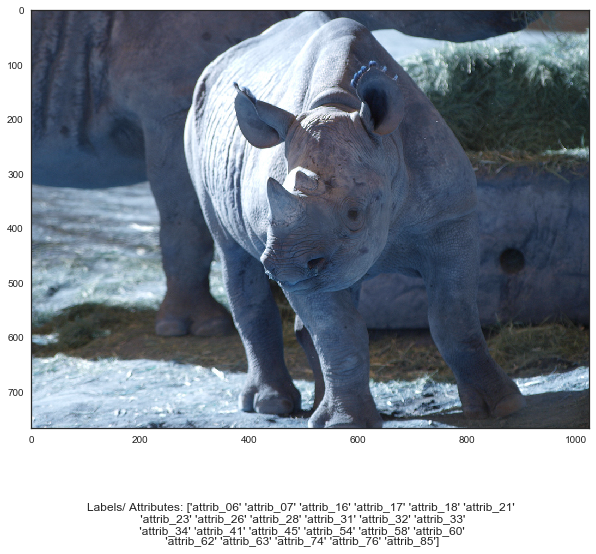

In [25]:
txt = 'Labels/ Attributes: ' + str(labels.values)
ax = plt.figure(figsize=(10, 10))
ax.text(.5, .05, txt, ha='center')
plt.imshow(img)

In the image above we can see a Rhinoceros and all the attributes associated with him.

### Data Preprocessing

Next, we will preprocess our image data before supplying it to the training model.

In [26]:
from tqdm import tqdm
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    return img

The above function reads an image and resizes it to 128 x 128 dimensions and returns it.

In [28]:
#temp = train.sample(frac=0.3)

In [29]:
#train = temp.reset_index(drop=True)

In [27]:
train_img = []
for img_path in tqdm(train.Image_name.values):
    train_img.append(read_img(TRAIN_PATH + img_path))

100%|██████████| 12600/12600 [02:49<00:00, 74.21it/s]


In [28]:
import gc

In [29]:
# Convert the image data into an array. 
# Since the range of color(RGB) is in the range of (0-255).
# Hence by dividing each image by 255, we convert the range to (0.0 - 1.0)

X_train = np.array(train_img, np.float32) / 255.

In [30]:
del train_img
gc.collect()

5

Next, we will calculate the mean and standard deviation.

In [31]:
mean_img = X_train.mean(axis=0)

In [32]:
std_dev = X_train.std(axis = 0)

Next, we will normalize the image data using the following formula: 

<center>** X = (x - mean of x)/(std. deviation of x)**<center/>


In [33]:
X_norm = (X_train - mean_img)/ std_dev

In [34]:
X_norm.shape

(12600, 128, 128, 3)

In [35]:
del X_train

In [36]:
gc.collect()

0

In [37]:
y = train[label_cols].values

In [38]:
from sklearn.model_selection import train_test_split

Finally, we create the training and validation sets.

In [39]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_norm, y, test_size=0.25, random_state=47)

In [40]:
del X_norm
gc.collect()

0

### Model Architecture

We will be using the Keras framework to create our model. But you may also use other frameworks like Tensorflow, Pytorch, etc.

In [105]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam, SGD

In [45]:
def multitask_loss(y_true, y_pred):
    # Avoid divide by 0
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    # Multi-task loss
    return K.mean(K.sum(- y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred), axis=1))

For this problem, we create a model from scratch. We will use a Sequential model, which is a linear stack of layers to build this model.

In [46]:
gc.collect()

0

In [137]:
# Network params
input_shape = Xtrain.shape[1:]
padding = 'same'
r_activation = 'relu'
p_activation = 'sigmoid'
classes = 85
dropout = 0.5
lr = 1e-3
beta_1 = 0.88

In [138]:
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))

model.add(Conv2D(32, kernel_size=(3, 3), activation=r_activation, padding=padding))
model.add(Conv2D(32, kernel_size=(3, 3), activation=r_activation))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropout))

model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation=r_activation, padding=padding))
model.add(Conv2D(64, kernel_size=(3, 3), activation=r_activation))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropout))

model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation=r_activation, padding=padding))
model.add(Conv2D(128, kernel_size=(3, 3), activation=r_activation))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(128, activation=r_activation))
model.add(Dropout(dropout))
model.add(Dense(128, activation=r_activation))
model.add(Dropout(dropout))
model.add(Dense(85, activation=p_activation))

Here we generate the summary our model. We can see that there are approximately 10 million parameters to train. 

In [139]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_13 (Batc (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 63, 63, 64)        18496     
__________

Next, we define our loss function, the optimizer and metrics for our model.

In [140]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(lr=lr, beta_1=beta_1), loss='binary_crossentropy', metrics=['accuracy'])

In [141]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')
checkpointer = ModelCheckpoint(filepath='weights.best.eda.hdf5', verbose=1, save_best_only=True)

Finally, we train our model.

In [143]:
model.fit(Xtrain, ytrain, validation_data=(Xvalid, yvalid), epochs=200, batch_size=50, callbacks=[checkpointer, early_stops], verbose=1)

Train on 9450 samples, validate on 3150 samples
Epoch 1/200
9450/9450 [==============================] - 646s 68ms/step - loss: 0.5335 - acc: 0.7314 - val_loss: 0.4986 - val_acc: 0.7485

Epoch 00001: val_loss improved from inf to 0.49861, saving model to weights.best.eda.hdf5
Epoch 2/200
3300/9450 [=========>....................] - ETA: 6:07 - loss: 0.5059 - acc: 0.7465

KeyboardInterrupt: 

In [112]:
train_pred = model.predict(Xtrain).round()

In [113]:
from sklearn.metrics import f1_score
f1_score(ytrain, train_pred, average='samples')

0.6721876931137002

In [114]:
valid_pred = model.predict(Xvalid).round()

In [115]:
f1_score(yvalid, valid_pred, average='samples')

0.6695431782711175

In [116]:
#del Xtrain
#del Xvalid
#del ytrain 
#del yvalid
gc.collect()

36095

### Prediction on Test Set

Now that we have built and trained our model, we will use it to predict the labels of the test images.

In [117]:
from sklearn.metrics import f1_score

In [118]:
test_img = []
for img_path in tqdm(test.Image_name.values):
    test_img.append(read_img(TEST_PATH + img_path))

100%|██████████| 5400/5400 [01:12<00:00, 74.06it/s]


In [119]:
X_test = np.array(test_img, np.float32) / 255.

In [120]:
del test_img
gc.collect()

0

The test images are normalized below.

In [121]:
mean_img = X_test.mean(axis=0)

In [122]:
std_dev = X_test.std(axis = 0)

In [123]:
X_norm_test = (X_test - mean_img)/ std_dev

In [124]:
del X_test
gc.collect()

0

Predict the labels on the test images.

In [125]:
model.load_weights('weights.best.eda.hdf5')

In [126]:
pred_test = model.predict(X_norm_test).round()

In [127]:
pred_test = pred_test.astype(np.int)

#### Creating the submission file

In [128]:
subm = pd.DataFrame()

In [129]:
subm['Image_name'] = test.Image_name

In [130]:
label_df = pd.DataFrame(data=pred_test, columns=label_cols)

In [131]:
subm = pd.concat([subm, label_df], axis=1)

In [132]:
subm.to_csv('submit.csv', index=False)

END.....